## 01. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'k88bMo9sJAisUv1_xPh1'

In [3]:
# Importing the IMF Cross Country Macroeconomic Statistics Data "United Kingdom" variable.

data = quandl.get('ODA/GBR_NGDPRPPPPC')

In [4]:
data.head(5)

,Value
Date,
1980-12-31,20547.12
1981-12-31,20378.55
1982-12-31,20812.97
1983-12-31,21682.03
1984-12-31,22139.02


In [5]:
data.shape

(45, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

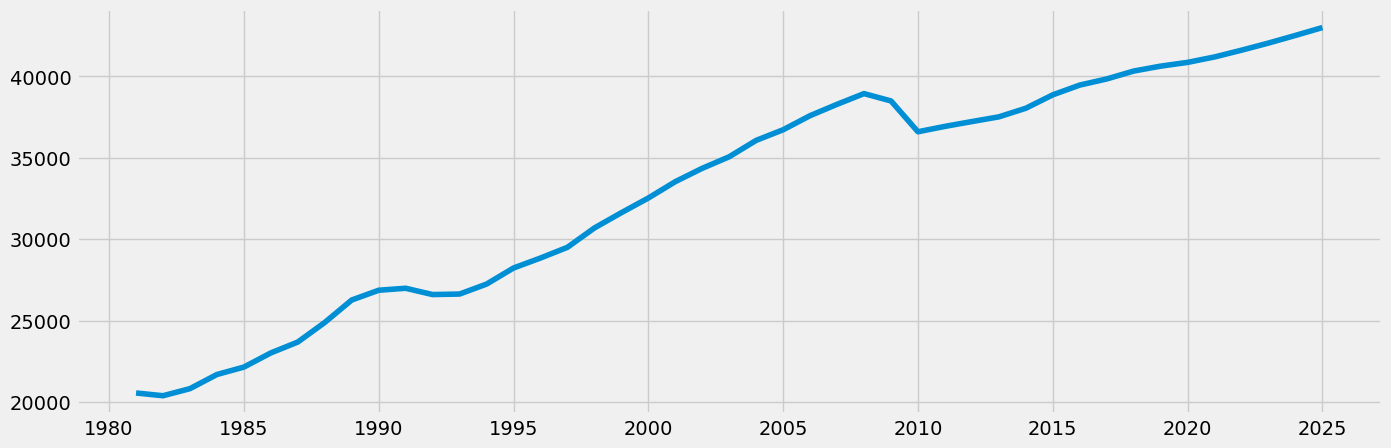

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [10]:
# I will not make a subset of my data as it is not overly huge

## Time Series Analysis: Decomposition

In [12]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [13]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

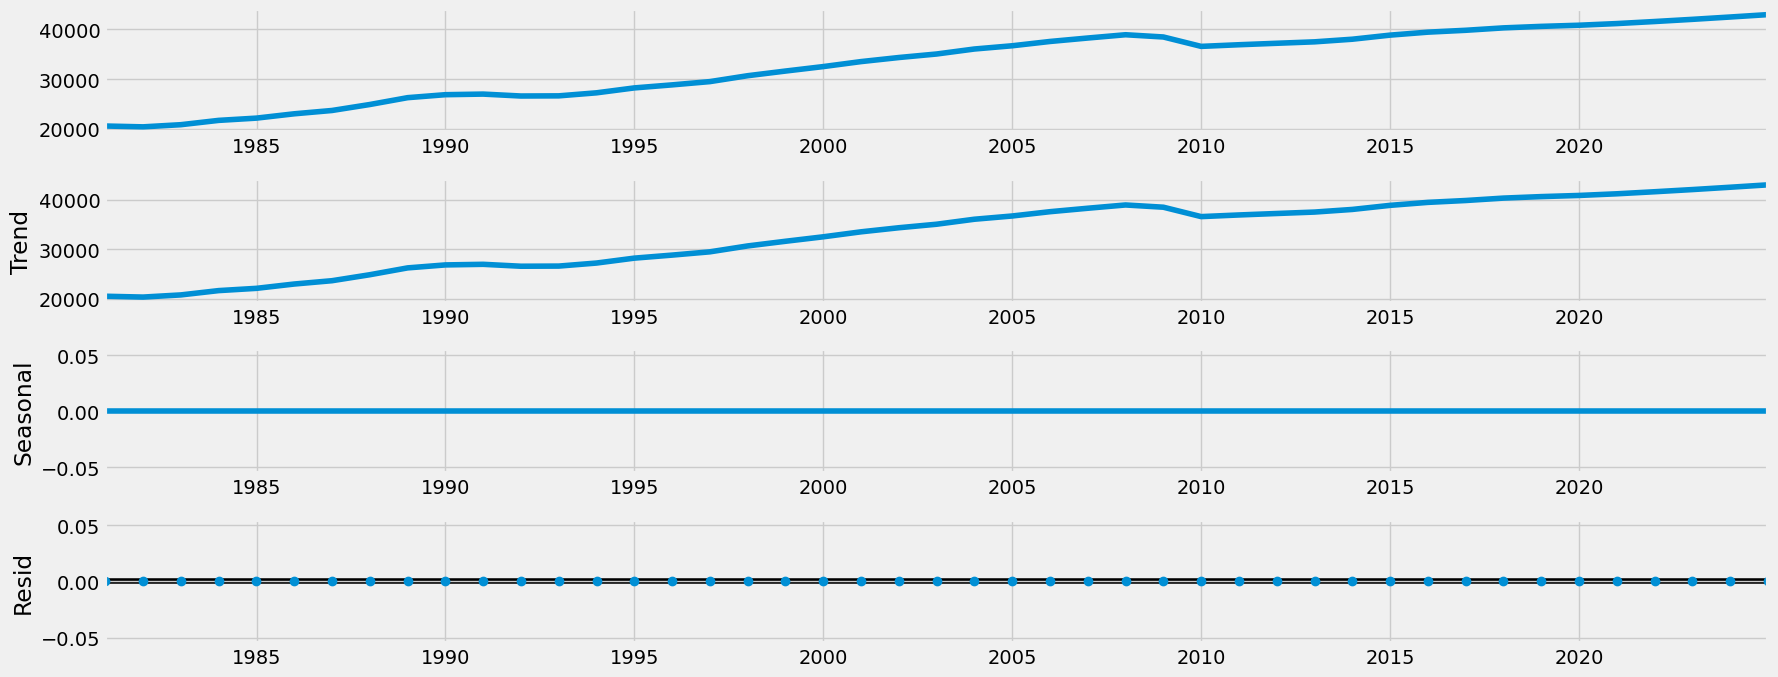

In [14]:
# Plot the separate components

decomposition.plot()
plt.show()

## The Resid and Seasonal seem to stay at 0. However the Trend follows a similar pattern. In 2010 we see a dip and afterwards a slow and steady increase over time

## Testing for Stationary

In [16]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.612335
p-value                         0.476750
Number of Lags Used             1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


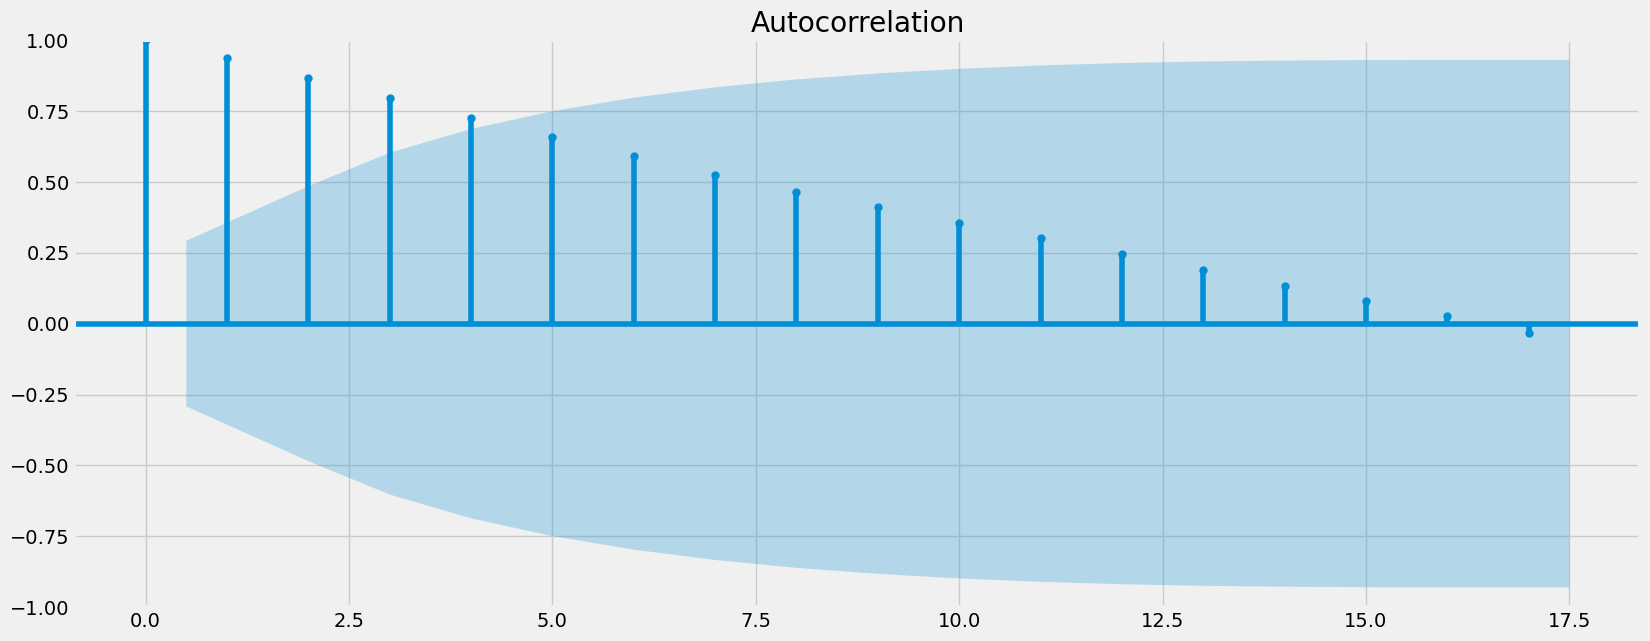

In [17]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

## the Dickey-Fuller test results suggest that the time series is non-stationary.

## the test statistic is greater than all of the critical values, and the p-value is greater than the significance level of 0.05. 

## Stationarizing the IMF Cross Country Macroeconomic Statistics Data 

In [18]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [19]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [20]:
data_diff.head()

,Value
Date,
1981-12-31,-168.57
1982-12-31,434.42
1983-12-31,869.06
1984-12-31,456.99
1985-12-31,869.72


In [21]:
data_diff.columns

Index(['Value'], dtype='object')

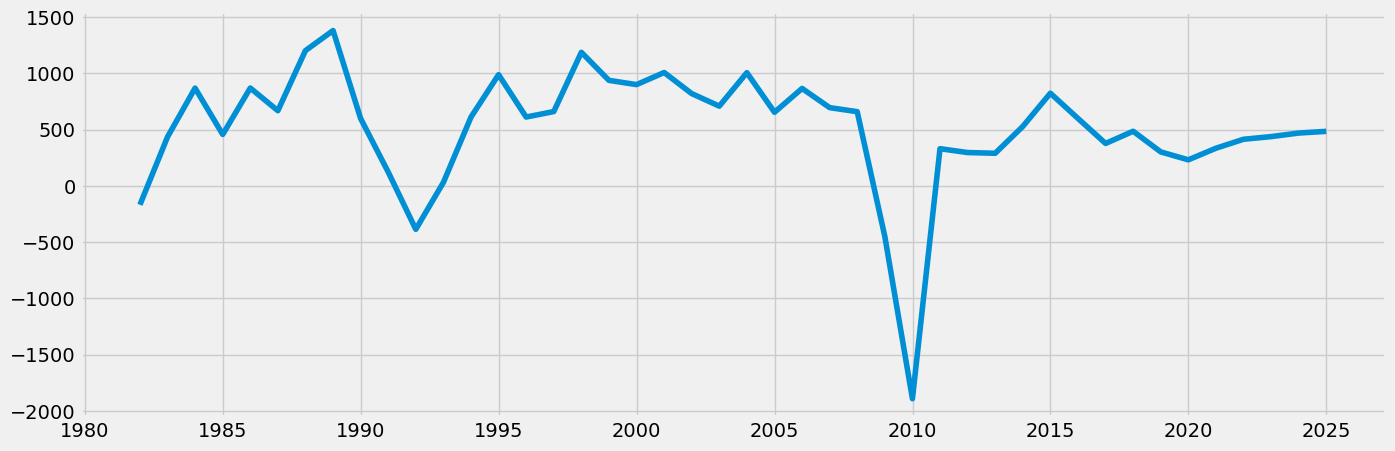

In [22]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.930046
p-value                         0.001825
Number of Lags Used             0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


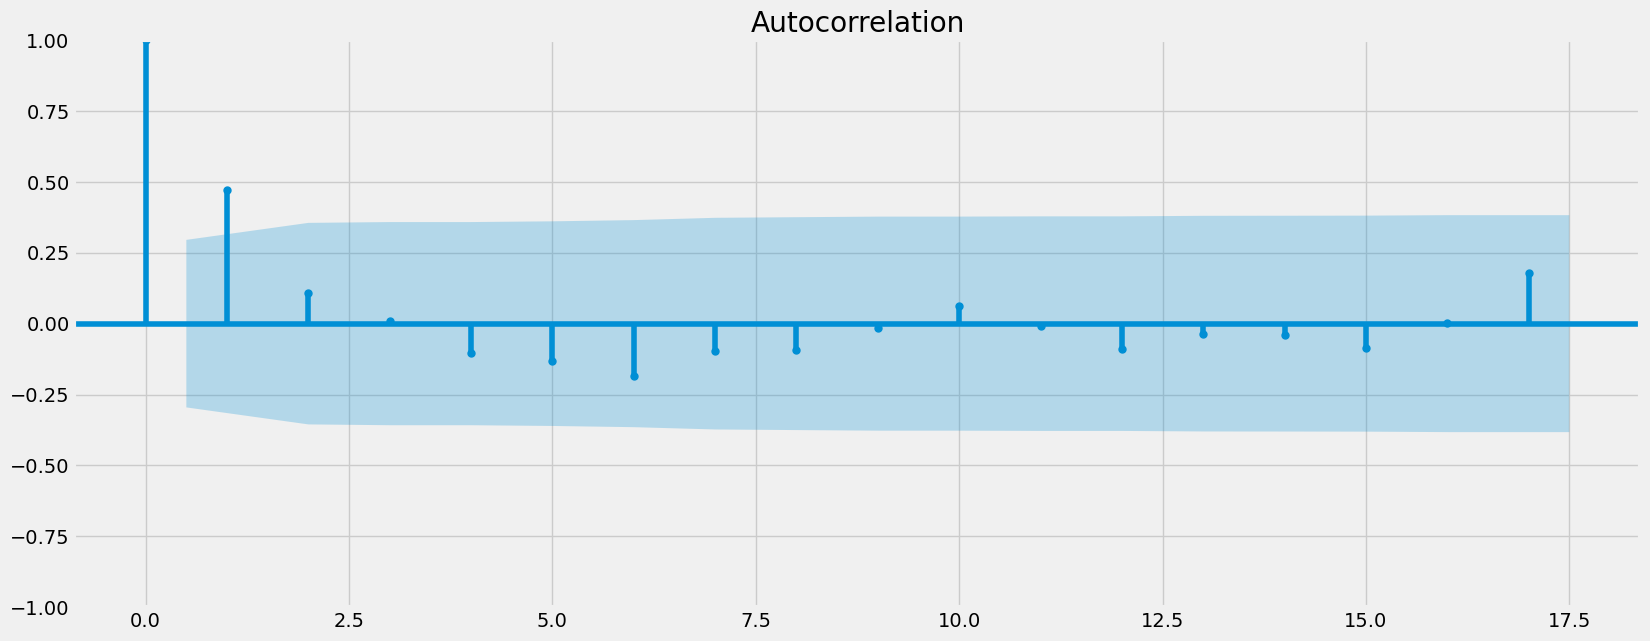

In [24]:
plot_acf(data_diff)
plt.show()